In [68]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )

%matplotlib inline

# machine learning
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Get the Data

In [31]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
full_df = train_df.append(test_df, ignore_index=True)

# Take A Quick Look

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [15]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

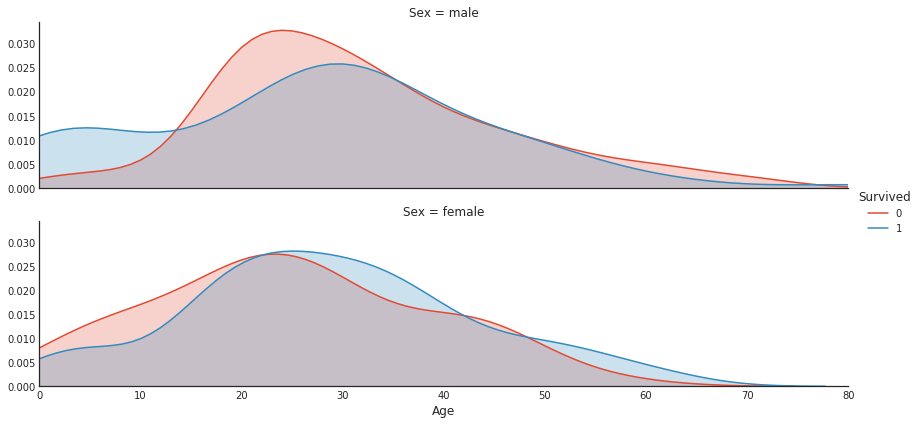

In [28]:
plot_distribution(train_df, var='Age', target='Survived', row='Sex')

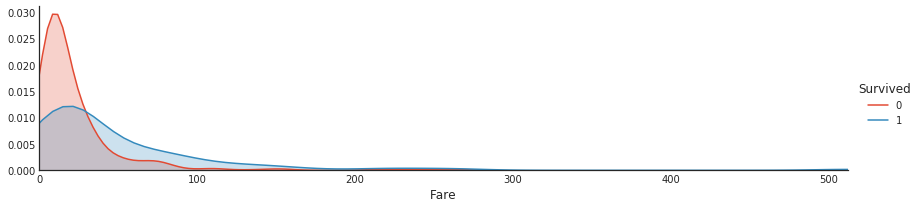

In [25]:
plot_distribution(train_df, var='Fare', target='Survived')

In [8]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

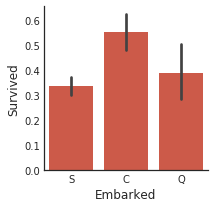

In [27]:
plot_categories(train_df, cat='Embarked', target='Survived')

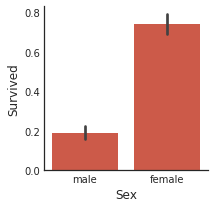

In [35]:
plot_categories(train_df, cat='Sex', target='Survived')

In [24]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


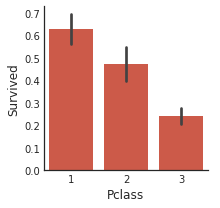

In [36]:
plot_categories(train_df, cat='Pclass', target='Survived')

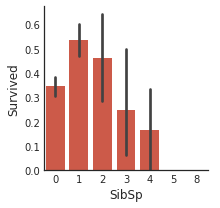

In [37]:
plot_categories(train_df, cat='SibSp', target='Survived')

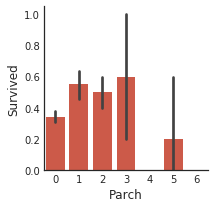

In [38]:
plot_categories(train_df, cat='Parch', target='Survived')

# Data Preparation

## Transform categorical features to numeric

In [42]:
# Transform Sex into binary 0 and 1
sex = pd.Series(np.where(full_df.Sex == 'male', 1, 0), name = 'Sex')
sex.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [43]:
# One-hot encode Embarked
embarked = pd.get_dummies(full_df.Embarked, prefix='Embarked')
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [44]:
# One-hot encode Pclass
pclass = pd.get_dummies(full_df.Pclass, prefix='Pclass')
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


## Fill missing values in features

In [45]:
# Create dataset
imputed = pd.DataFrame()

# Fill missing value of Age with median Age of training set
imputed['Age'] = full_df.Age.fillna(train_df.Age.median())

# Fill missing value of Fare with median Fare of training set 
imputed['Fare'] = full_df.Fare.fillna(train_df.Fare.median())

imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


## Create new features

In [46]:
family = pd.DataFrame()

# new feature FamilySize (including the passenger)
family['FamilySize'] = full_df['Parch'] + full_df['SibSp'] + 1

# new features based on family size
family['Family_Single'] = family['FamilySize'].map(lambda s : 1 if s == 1 else 0)
family['Family_Small'] = family['FamilySize'].map(lambda s : 1 if 2 <= s <= 4 else 0)
family['Family_Large'] = family['FamilySize'].map(lambda s : 1 if 5 <= s else 0)

family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


## Assembly dataset for model

In [52]:
full_prepared_data = pd.concat([imputed, embarked, pclass, sex, family], axis=1)
full_prepared_data.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex,FamilySize,Family_Single,Family_Small,Family_Large
0,22.0,7.2500,0,0,1,0,0,1,1,2,0,1,0
1,38.0,71.2833,1,0,0,1,0,0,0,2,0,1,0
2,26.0,7.9250,0,0,1,0,0,1,0,1,1,0,0
3,35.0,53.1000,0,0,1,1,0,0,0,2,0,1,0
4,35.0,8.0500,0,0,1,0,0,1,1,1,1,0,0


In [53]:
full_prepared_data.shape

(1309, 13)

In [58]:
X_train_val = full_prepared_data[:891]
y_train_val = train_df.Survived

X_test = full_prepared_data[891:]

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=0.8)

print(full_prepared_data.shape, X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape)

(1309, 13) (712, 13) (179, 13) (712,) (179,) (418, 13)


# Modeling

## K-nearest neighbors

In [61]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [62]:
print(knn_clf.score(X_train, y_train), knn_clf.score(X_val, y_val))

0.839887640449 0.759776536313


## Logistic Regression

In [59]:
# Logistic Regression model
logit_clf = LogisticRegression()
logit_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
# score the model
print(logit_clf.score(X_train, y_train), logit_clf.score(X_val, y_val))

0.818820224719 0.798882681564


## Support Vector Machines

In [66]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
print(svm_clf.score(X_train, y_train), svm_clf.score(X_val, y_val))

0.879213483146 0.72625698324


## Random Forests

In [64]:
forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [65]:
print(forest_clf.score(X_train, y_train), forest_clf.score(X_val, y_val))

0.980337078652 0.826815642458


## Gradient Boosting Classifier

In [69]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [70]:
print(gb_clf.score(X_train, y_train), gb_clf.score(X_val, y_val))

0.904494382022 0.821229050279


# Submit

In [71]:
Y_test = forest_clf.predict(X_test)
passenger_id = test_df.PassengerId
test = pd.DataFrame({'PassengerId': passenger_id , 'Survived': Y_test})
test.shape
test.head()
test.to_csv( 'titanic_pred.csv' , index = False )